In [1]:
import uproot
import hist
from hist import Hist
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep

In [4]:
##Make this different for different root files
uproot_thing = uproot.open("/home/submit/caitl961/FCCAnalyzer/output_h_bb_ee_40GeV_flavourtag.root")
for key in uproot_thing.keys():
    print(key)

wzp6_ee_nunuH_Hbb_ecm240;1
wzp6_ee_nunuH_Hbb_ecm240/muons_all_p_cut0;1
wzp6_ee_nunuH_Hbb_ecm240/muons_all_theta_cut0;1
wzp6_ee_nunuH_Hbb_ecm240/muons_all_phi_cut0;1
wzp6_ee_nunuH_Hbb_ecm240/muons_all_q_cut0;1
wzp6_ee_nunuH_Hbb_ecm240/muons_all_no_cut0;1
wzp6_ee_nunuH_Hbb_ecm240/electrons_all_p_cut0;1
wzp6_ee_nunuH_Hbb_ecm240/electrons_all_theta_cut0;1
wzp6_ee_nunuH_Hbb_ecm240/electrons_all_phi_cut0;1
wzp6_ee_nunuH_Hbb_ecm240/electrons_all_q_cut0;1
wzp6_ee_nunuH_Hbb_ecm240/electrons_all_no_cut0;1
wzp6_ee_nunuH_Hbb_ecm240/cutFlow;1
wzp6_ee_nunuH_Hbb_ecm240/electron1_p;1
wzp6_ee_nunuH_Hbb_ecm240/electron2_p;1
wzp6_ee_nunuH_Hbb_ecm240/ee_recoil_m_nOne;1
wzp6_ee_nunuH_Hbb_ecm240/ee_p_nOne;1
wzp6_ee_nunuH_Hbb_ecm240/cosThetaMiss_nOne;1
wzp6_ee_nunuH_Hbb_ecm240/missingEnergy_nOne;1
wzp6_ee_nunuH_Hbb_ecm240/acolinearity_nOne;1
wzp6_ee_nunuH_Hbb_ecm240/zee_m_nOne;1
wzp6_ee_nunuH_Hbb_ecm240/zee_m;1
wzp6_ee_nunuH_Hbb_ecm240/muons_no;1
wzp6_ee_nunuH_Hbb_ecm240/electrons_no;1
wzp6_ee_nunuH_Hbb_ecm2

The histograms are saved as `process_name/histogram_name`. We will now plot the Z peak after all the cuts (stored in `zll_m_cut4`) for the main `wzp6_ee_mumu_ecm91p2` process:

And let's plot them stacked:

# Cutflow

In [5]:
hqq_zmumu_cutFlow = uproot_thing['wzp6_ee_mumuH_Hbb_ecm240/cutFlow'].to_hist()
hqq_zee_cutFlow = uproot_thing['wzp6_ee_eeH_Hbb_ecm240/cutFlow'].to_hist()
hqq_ztautau_cutFlow = uproot_thing['wzp6_ee_tautauH_Hbb_ecm240/cutFlow'].to_hist()
hqq_WW_cutFlow = uproot_thing['p8_ee_WW_ecm240/cutFlow'].to_hist()
hqq_ZZ_cutFlow = uproot_thing['p8_ee_ZZ_ecm240/cutFlow'].to_hist()



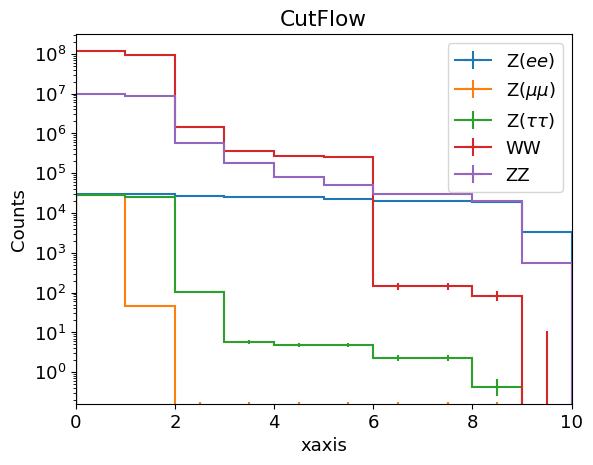

In [6]:
plt.rcParams.update({'font.size': 13})
hep.histplot([hqq_zee_cutFlow, hqq_zmumu_cutFlow, hqq_ztautau_cutFlow, hqq_WW_cutFlow, hqq_ZZ_cutFlow], label=[r'Z($ee$)', r'Z($\mu\mu$)', r'Z($\tau\tau$)', r'WW', r'ZZ'])
plt.legend()
plt.xlim(0,10)
plt.yscale("log")
#plt.xlabel("Cut")
plt.ylabel("Counts")
plt.title("CutFlow")
#plt.xticks([0,1,2,3,4,5,6,7,8],
           #["No Cuts", "Veto electrons", "2 OS Muons", "Recoil Cut", "Momentum", r"cos($\theta$)", "Missing Energy", "Acolinearity", "Z mass"],
          #rotation=-45, ha="left")
plt.savefig("CutFlow")

# Cross Section Calculation

In [8]:
##Efficiency Calculation

final_cut_events=hqq_zee_cutFlow[9].value
zmumu_events_2=hqq_zee_cutFlow[2].value
print("Cut 8 Events = ", final_cut_events)
print("Cut 2 Events = ", zmumu_events_2)
efficiency=final_cut_events/zmumu_events_2
print("Efficiency =", efficiency)

Cut 8 Events =  3374.906256
Cut 2 Events =  26012.199582
Efficiency = 0.129743209349177


In [9]:
##Acceptance calculation
events_zmumu_sample=300000
weight=0.00394*7200000/300000
print("Cut 2 Events = ", )
print("Weighted Sample Events/Cut 0 events = ", events_zmumu_sample*weight)
acceptance=zmumu_events_2/(events_zmumu_sample*weight)
print("Acceptance = ", acceptance)

Cut 2 Events = 
Weighted Sample Events/Cut 0 events =  28368.0
Acceptance =  0.9169557100253808


In [10]:
#Luminosity
lum=7200000

In [11]:
Nsig=final_cut_events

Nsig/(acceptance*efficiency*lum)

0.00394

# Cut 4 Momentum

In [10]:
hqq_mumu_p = uproot_thing['wzp6_ee_mumuH_Hbb_ecm240/mumu_p_nOne'].to_hist()
hqq_ee_p = uproot_thing['wzp6_ee_eeH_Hbb_ecm240/mumu_p_nOne'].to_hist()
hqq_tautau_p = uproot_thing['wzp6_ee_tautauH_Hbb_ecm240/mumu_p_nOne'].to_hist()
hqq_WW_p = uproot_thing['p8_ee_WW_ecm240/mumu_p_nOne'].to_hist()
hqq_ZZ_p = uproot_thing['p8_ee_ZZ_ecm240/mumu_p_nOne'].to_hist()

/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


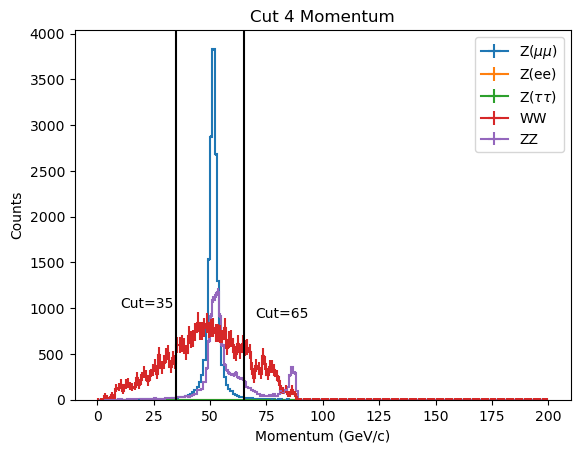

In [11]:
plt.rcParams.update({'font.size': 10})
hep.histplot([hqq_mumu_p, hqq_ee_p, hqq_tautau_p, hqq_WW_p, hqq_ZZ_p], label=[r'Z($\mu\mu$)', r'Z(ee)', r'Z($\tau\tau$)', r'WW', r'ZZ'])
plt.legend()
#plt.xlim(20,85)
plt.xlabel("Momentum (GeV/c)") #check units
plt.ylabel("Counts")
plt.title("Cut 4 Momentum")
#plt.yscale("log")
plt.axvline(35, ymin=-1, ymax=10000000, color='black')
plt.axvline(65, ymin=-1, ymax=10000000, color='black')
plt.text(10, 1000, "Cut=35")
plt.text(70, 900, "Cut=65")
plt.savefig("Muon_momentum")

# Cut 3 Recoil Mass

In [12]:
hqq_zmumu_recoil = uproot_thing['wzp6_ee_mumuH_Hbb_ecm240/mumu_recoil_m_nOne'].to_hist()
hqq_zee_recoil = uproot_thing['wzp6_ee_eeH_Hbb_ecm240/mumu_recoil_m_nOne'].to_hist()
hqq_ztautau_recoil = uproot_thing['wzp6_ee_tautauH_Hbb_ecm240/mumu_recoil_m_nOne'].to_hist()
hqq_WW_recoil = uproot_thing['p8_ee_WW_ecm240/mumu_recoil_m_nOne'].to_hist()
hqq_noise2_recoil = uproot_thing['p8_ee_ZZ_ecm240/mumu_recoil_m_nOne'].to_hist()

/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


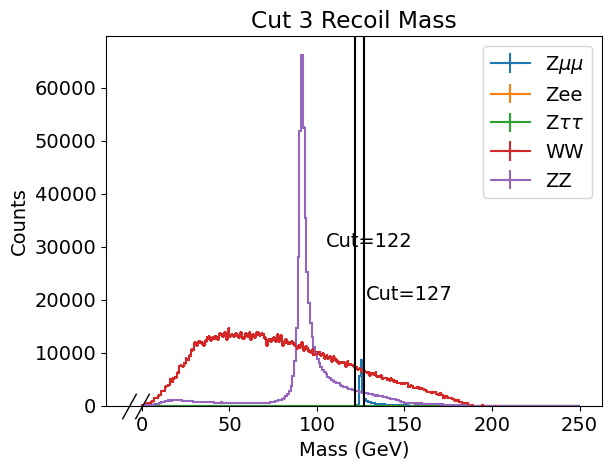

In [13]:
plt.rcParams.update({'font.size': 14})
hep.histplot([hqq_zmumu_recoil, hqq_zee_recoil, hqq_ztautau_recoil, hqq_WW_recoil, hqq_noise2_recoil], label=[r'Z$\mu\mu$', r'Zee', r'Z$\tau\tau$', r'WW', r'ZZ'])
plt.legend()
plt.xlabel("Mass (GeV)")
plt.ylabel("Counts")
#plt.xlim(80,170)
plt.title("Cut 3 Recoil Mass")
#plt.yscale("log")
plt.axvline(122, ymin=-1, ymax=600000, color='black')
plt.axvline(127, ymin=-1, ymax=600000, color='black')
plt.text(105, 30000, "Cut=122")
plt.text(128, 20000, "Cut=127")
plt.savefig("Recoil_Mass(Higgs)")

# Cut 6 Missing Energy

In [14]:
hqq_zmumu_E = uproot_thing['wzp6_ee_mumuH_Hbb_ecm240/missingEnergy_nOne'].to_hist()
hqq_zee_E = uproot_thing['wzp6_ee_eeH_Hbb_ecm240/missingEnergy_nOne'].to_hist()
hqq_ztautau_E = uproot_thing['wzp6_ee_tautauH_Hbb_ecm240/missingEnergy_nOne'].to_hist()
hqq_WW_E = uproot_thing['p8_ee_WW_ecm240/missingEnergy_nOne'].to_hist()
hqq_ZZ_E = uproot_thing['p8_ee_ZZ_ecm240/missingEnergy_nOne'].to_hist()

/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


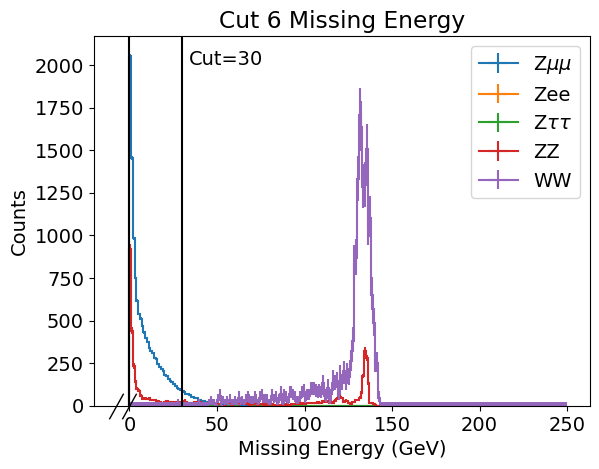

In [15]:
hep.histplot([hqq_zmumu_E, hqq_zee_E, hqq_ztautau_E, hqq_ZZ_E, hqq_WW_E], label=[r'Z$\mu\mu$', r'Zee', r'Z$\tau\tau$', r'ZZ', r'WW'])
plt.legend()
plt.xlabel("Missing Energy (GeV)") #check units
plt.ylabel("Counts")
plt.title("Cut 6 Missing Energy")
#plt.yscale("log")
plt.axvline(0, ymin=-1, ymax=600000, color='black')
plt.axvline(30, ymin=-1, ymax=600000, color='black')
plt.text(34, 2000, "Cut=30")
plt.savefig("Missing_energy")

# Cut 8

In [16]:
hqq_zmumu_m = uproot_thing['wzp6_ee_mumuH_Hbb_ecm240/zmumu_m_nOne'].to_hist()
hqq_zee_m = uproot_thing['wzp6_ee_eeH_Hbb_ecm240/zmumu_m_nOne'].to_hist()
hqq_ztautau_m = uproot_thing['wzp6_ee_tautauH_Hbb_ecm240/zmumu_m_nOne'].to_hist()
hqq_WW_m = uproot_thing['p8_ee_WW_ecm240/zmumu_m_nOne'].to_hist()
hqq_ZZ_m = uproot_thing['p8_ee_ZZ_ecm240/zmumu_m_nOne'].to_hist()

/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


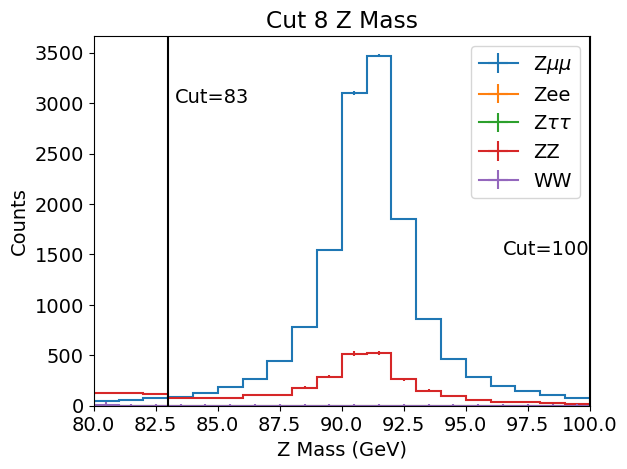

In [17]:
hep.histplot([hqq_zmumu_m, hqq_zee_m, hqq_ztautau_m, hqq_ZZ_m, hqq_WW_m], label=[r'Z$\mu\mu$', r'Zee', r'Z$\tau\tau$', r'ZZ', r'WW'])
plt.legend()
plt.xlim(80,100)
plt.xlabel("Z Mass (GeV)") #check units
plt.ylabel("Counts")
plt.title("Cut 8 Z Mass")
#plt.yscale("log")
plt.axvline(83, ymin=-1, ymax=6000, color='black')
plt.axvline(100, ymin=-1, ymax=6000, color='black')
plt.text(83.25, 3000, "Cut=83")
plt.text(96.5, 1500, "Cut=100")
plt.savefig("Reconstructed_Z_mass")


In [55]:
WW_no_cuts=hqq_WW_cutFlow[0].value
WW_veto_electrons=hqq_WW_cutFlow[1].value
WW_2_mu=hqq_WW_cutFlow[2].value
WW_recoil_mass=hqq_WW_cutFlow[3].value
WW_momentum_cut=hqq_WW_cutFlow[4].value
WW_angle=hqq_WW_cutFlow[5].value
WW_missing_e=hqq_WW_cutFlow[6].value
WW_acolin=hqq_WW_cutFlow[7].value
WW_zmass_cut=hqq_WW_cutFlow[8].value
print(f'No cuts:{WW_no_cuts}')
print(f'Veto Elec: {WW_veto_electrons}')
print(f'Two Muons: {WW_2_mu}')
print(f'Recoil mass between 122 and 127 GeV: {WW_recoil_mass}')
print(f'Momentum between 35 and 65: {WW_momentum_cut}')
print(f'cos(theta)<0.98: {WW_angle}')
print(f'Missing E<30: {WW_missing_e}')
print(f'acolinearity>0.05: {WW_acolin}')
print(f'Z-Mass between 83 & 100: {WW_zmass_cut}')

No cuts:118357200.00000001
Veto Elec: 93979150.55893923
Two Muons: 1428141.5700891493
Recoil mass between 122 and 127 GeV: 34032.74386253276
Momentum between 35 and 65: 20142.07008664365
cos(theta)<0.98: 19465.92285758671
Missing E<30: 11.862232088718287
acolinearity>0.05: 11.862232088718287
Z-Mass between 83 & 100: 0.0


In [56]:
hqq_WW_theta = uproot_thing['p8_ee_WW_ecm240/cosThetaMiss_nOne'].to_hist() #cos(theta)<0.98
# missing energy hist WW is hqq_WW_E, missingEnergy < 30
hqq_WW_acolinearity=uproot_thing['p8_ee_WW_ecm240/acolinearity_nOne'].to_hist() #acolinearity > 0.05
hqq_WW_zmass=uproot_thing['p8_ee_WW_ecm240/zmumu_m_nOne'].to_hist() #zmumu_m > 83 && zmumu_m < 100

In [80]:
print(f"Before recoil cut: {hqq_WW_recoil[:].sum(0).value}")
ww_recoil_array=hqq_WW_recoil[:].to_numpy(0)[0]
ww_recoil_cut=ww_recoil_array[122:127]
print(f"After force recoil cut: {ww_recoil_cut.sum()}")
print(f'After computer recoil cut, before momentum cut:{hqq_WW_p[:].sum(0).value}')
ww_momentum_cut=hqq_WW_p.to_numpy(0)[0][35:65]
print(f"After force momentum cut: {ww_momentum_cut.sum()}")
print(f'After momentum cut, before angle cut: {hqq_WW_theta[:].sum(0).value}')
ww_angle_array = hqq_WW_theta.to_numpy(0)[0]
index_angle_array = hqq_WW_theta.to_numpy(0)[1][1:10001]
angle_cut=index_angle_array<0.98
ww_angle_cut=ww_angle_array[angle_cut]
print(f'After force angle cut: {ww_angle_cut.sum()}')
print(f'After angle cut, before missing energy cut: {hqq_WW_E[:].sum(0).value}')
ww_energy_array=hqq_WW_E[:].to_numpy(0)[0]
ww_energy_cut=ww_energy_array[0:30]
print(f'After force energy cut: {ww_energy_cut.sum()}')


Before recoil cut: 1423918.615465567
After force recoil cut: 34032.74386253276
After computer recoil cut, before momentum cut:34032.74386253276
After force momentum cut: 20142.070086643656
After momentum cut, before angle cut: 20142.07008664409
After force angle cut: 19465.92285758671
After angle cut, before missing energy cut: 19465.92285758671
After force energy cut: 11.862232088718287
